# Part 2

### Q1: Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### Import Dataset

In [2]:
df_final = pd.read_pickle(r'C:\Users\Owner\Desktop\Data Analyst\01-31-2022 Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_customer.pkl')

In [4]:
df_final.head()

,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,days_since_prior_order,df_ords_first_order,product_id,add_to_cart_order,reordered,...,frequency_flag,surname,gender,state,age,date_joined,dependants,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [5]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 32 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int32   
 3   orders_day_of_week      int32   
 4   orders_time_of_day      int32   
 5   days_since_prior_order  float32 
 6   df_ords_first_order     bool    
 7   product_id              int32   
 8   add_to_cart_order       int32   
 9   reordered               int32   
 10  product_name            category
 11  aisle_id                int32   
 12  department_id           int32   
 13  prices                  float32 
 14  price_range_loc         category
 15  busiest_days            category
 16  busiest_period_of_day   category
 17  max_order               int32   
 18  loyalty_flag            category
 19  spending                float32 
 20  spending_flag           category
 21  order_

#### Reduce memory usage

In [6]:
df_final.drop(columns = ['_merge', 'reordered'])

,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,days_since_prior_order,df_ords_first_order,product_id,add_to_cart_order,product_name,...,order_frequency,frequency_flag,surname,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,1,2,8,NaN,True,196,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,Soda,...,20.5,Non-frequent customer,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,26,4,23,5.0,False,19675,1,Organic Raspberry Black Tea,...,7.0,Frequent customer,Yates,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,True,47210,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,False,47210,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,False,47210,1,Fresh Farmed Tilapia Fillet,...,30.0,Non-frequent customer,Arroyo,Female,Tennessee,22,9/12/2017,3,married,46151


In [7]:
df = df_final.drop(columns = ['_merge', 'reordered'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 30 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   user_id                 int32   
 2   order_number            int32   
 3   orders_day_of_week      int32   
 4   orders_time_of_day      int32   
 5   days_since_prior_order  float32 
 6   df_ords_first_order     bool    
 7   product_id              int32   
 8   add_to_cart_order       int32   
 9   product_name            category
 10  aisle_id                int32   
 11  department_id           int32   
 12  prices                  float32 
 13  price_range_loc         category
 14  busiest_days            category
 15  busiest_period_of_day   category
 16  max_order               int32   
 17  loyalty_flag            category
 18  spending                float32 
 19  spending_flag           category
 20  order_frequency         float32 
 21  freque

### Q2: If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

#### Bar Chart

<AxesSubplot:>

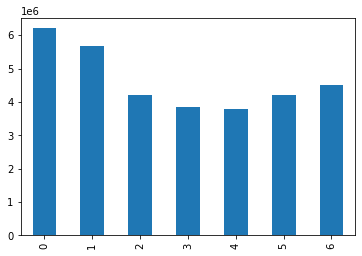

In [11]:
df['orders_day_of_week'].value_counts().sort_index().plot.bar()

#### Colored Bar chart

<AxesSubplot:>

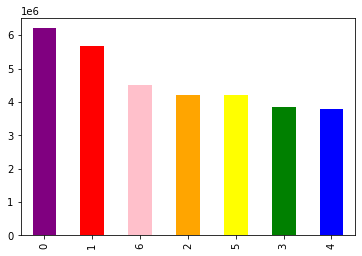

In [12]:
df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

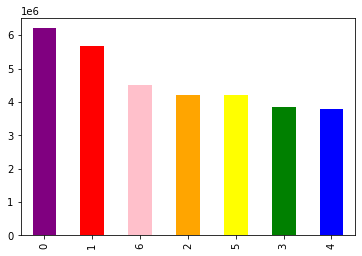

In [13]:
bar_new = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [14]:
path = r'C:\Users\Owner\Desktop\Data Analyst\01-31-2022 Instacart Basket Analysis'

In [15]:
# Export visualization

bar_new.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar__new_orders_dow.png'))

#### Histogram

<AxesSubplot:ylabel='Frequency'>

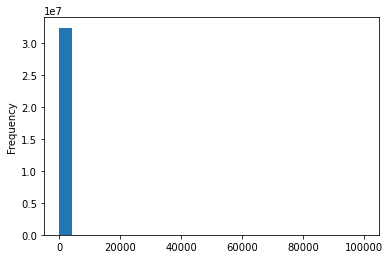

In [16]:
df['prices'].plot.hist(bins = 25)

In [17]:
df.loc[df['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,orders_time_of_day,days_since_prior_order,df_ords_first_order,product_id,add_to_cart_order,product_name,...,order_frequency,frequency_flag,surname,gender,state,age,date_joined,dependants,marital_status,income
7805,1435153,1519,26,2,11,6.0,False,21553,15,Lowfat 2% Milkfat Cottage Cheese,...,6.0,Frequent customer,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,False,21553,28,Lowfat 2% Milkfat Cottage Cheese,...,6.0,Frequent customer,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,False,21553,1,Lowfat 2% Milkfat Cottage Cheese,...,5.0,Frequent customer,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,False,33664,2,2 % Reduced Fat Milk,...,8.0,Frequent customer,Compton,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,True,21553,3,Lowfat 2% Milkfat Cottage Cheese,...,14.0,Regular customer,Allen,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,False,33664,2,2 % Reduced Fat Milk,...,13.0,Regular customer,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,False,33664,1,2 % Reduced Fat Milk,...,13.0,Regular customer,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,False,33664,14,2 % Reduced Fat Milk,...,23.0,Non-frequent customer,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,False,33664,4,2 % Reduced Fat Milk,...,6.0,Frequent customer,Browning,Female,South Carolina,48,1/18/2017,2,married,398880


In [18]:
df.loc[df['prices'] >100, 'prices'] = np.nan

In [19]:
df['prices'].max()

25.0

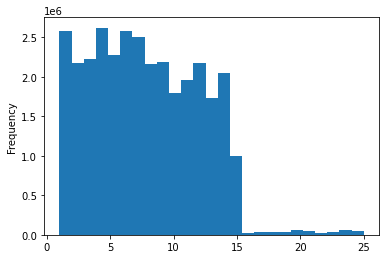

In [20]:
hist = df['prices'].plot.hist(bins = 25)

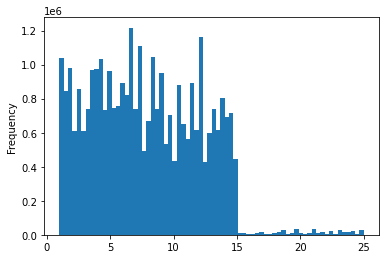

In [21]:
hist = df['prices'].plot.hist(bins = 70)

In [22]:
# Export visualization

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_new_orders_dow.png'))

#### Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

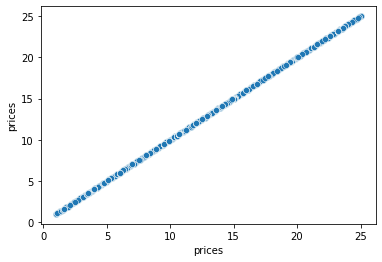

In [23]:
sns.scatterplot(x = 'prices', y = 'prices',data = df)

#### Sampling data

In [25]:
df_sample = df[:2000000]

In [26]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [29]:
# Store 70% of the sample in the dataframe big

big = df[dev]

In [30]:
# Store 30% of the sample in the dataframe small

small = df[~dev]

In [31]:
len(df)

32404859

In [32]:
len(big) + len(small)

32404859

In [33]:
df_2 = small[['orders_day_of_week', 'prices']]

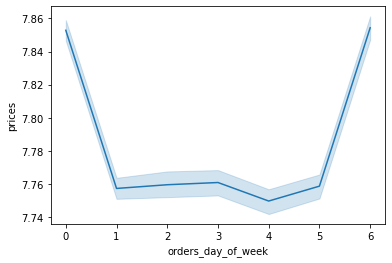

In [34]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [35]:
# Export visualization

line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_day_of_week_price_line.png'))

In [36]:
df_4 = df[['orders_day_of_week', 'prices']]

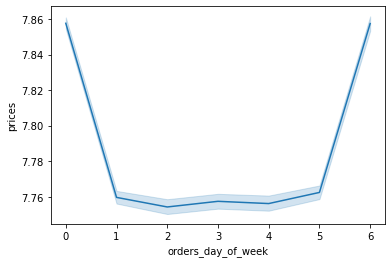

In [37]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')

In [38]:
# Export visualization

line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'day_of_week_price_line.png'))

### Q3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

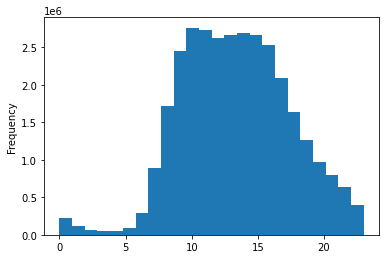

In [39]:
hist_2 = df['orders_time_of_day'].plot.hist(bins = 24)

The results shows that most of the orders were placed during lunch time/midday.

In [40]:
# Export visualization

hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_hist.png'))

### Q4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

<AxesSubplot:>

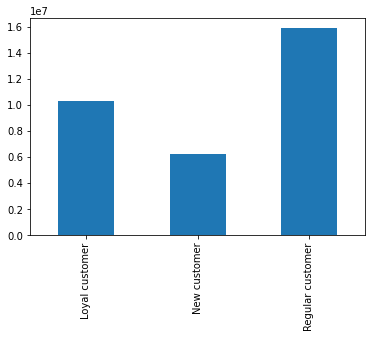

In [41]:
df['loyalty_flag'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

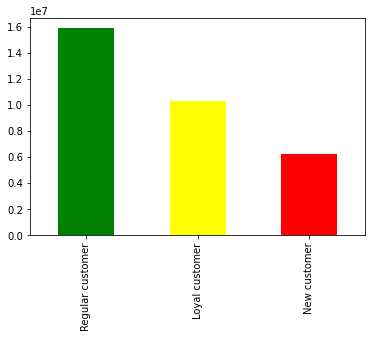

In [42]:
df['loyalty_flag'].value_counts().plot.bar(color =['green', 'yellow', 'red'])

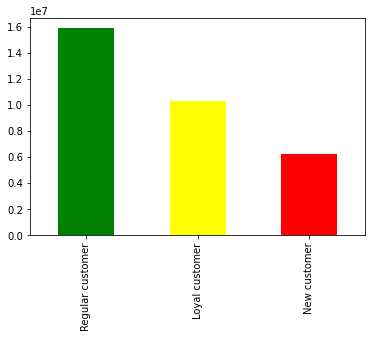

In [43]:
# Export visualization

bar_4 = df['loyalty_flag'].value_counts().plot.bar(color =['green', 'yellow', 'red'])

In [44]:
# Export visualization

bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_bar.png'))

### Q5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

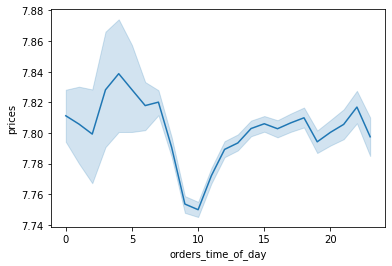

In [45]:
line_3 = sns.lineplot(data = df, x = 'orders_time_of_day', y = 'prices')

In [46]:
# Export visualization

line_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_prices_line.png'))

### Q6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents:
-  In a markdown cell beneath your line chart, describe what the line chart shows.

In [47]:
df_small = df[['age', 'dependants']]

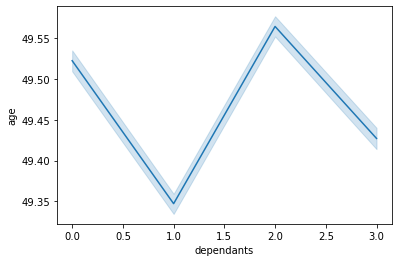

In [48]:
line_4 = sns.lineplot(data = df_small, x = 'dependants', y = 'age')

The average age for the customers is 49 and I dont believe there is a connection between the age and number of dependants.

In [49]:
# Export visualization

line_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hour_prices_line.png'))

### Q7: You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

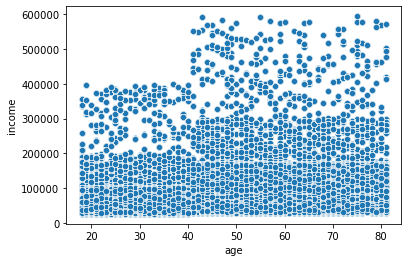

In [50]:
df_scatter = sns.scatterplot(data = df, x = 'age', y = 'income')

There is a weak positive relationship between age and spending power.

In [51]:
# Export visualizatioon

df_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))